In [1]:
#该命令可以在作图后直接显示图像
%matplotlib inline

## 1. 通过Beta Geometric/Negative Binorminal Distritution 模型预测未来一段时间内的频次

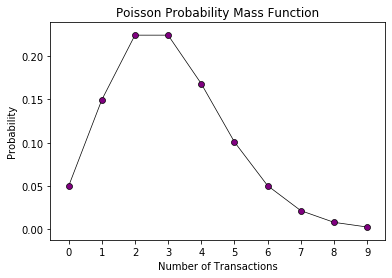

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson,expon,nbinom

#指定泊松分布参数lambda取值，假设小王一年内会产生的交易次数是一个随机过程（计划跟不上变化），但其背后的本质是一个lambda=3的泊松分布
poisson_lambda = 3
p_arr = []


distribution = poisson(poisson_lambda)
for transactions in range(0,10):
     p_arr.append(distribution.pmf(transactions))

plt.ylabel('Probability')
plt.xlabel('Number of Transactions')
plt.xticks(range(0, 10))
plt.title('Poisson Probability Mass Function')
plt.plot(p_arr, color='black', linewidth=0.7, zorder=1)
plt.scatter(range(0, 10), p_arr, color='purple', edgecolor='black', linewidth=0.7, zorder=2)
plt.show()
#从图中我们可以发现，如果对小王观察一年时间，有可能观察到各种各样的交易结果（从0次到9次甚至更多），但概率最高的交易结果集中在1-4次，这就是由
#泊松分布的参数lambda决定的。

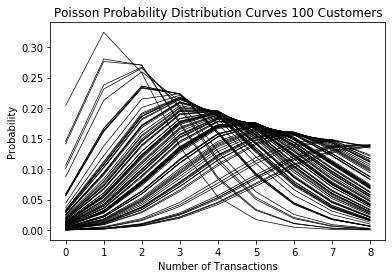

In [23]:
#然而每个人有每个人的情况，可能小王的lambda=3，但其他人的lambda不一定是3，更有可能的是千人千个不同的lambda。那这些不同的lambda符合一个
#怎样的规律呢？在BG/NBD模型里，就假设一群人的lambda分布是不均匀的（人与人之间不完全相同),而这个lambda的分布符合gamma分布

#Gamma分布主要由两个参数决定，参数gamma决定分布的形状，参数alpha决定分布的尺度。

#这里我们先举一个例子，看一下一个
gamma_shape = 10 #gamma，形状参数=9
gamma_scale = 0.5 #alpha，尺度参数=0.5的gamma分布可以描绘怎样的一群用户

for customer in range(0, 100):
    distribution = poisson(np.random.gamma(shape=gamma_shape, scale=gamma_scale))
    p_arr = []
    for transactions in range(0,9):
        p_arr.append(distribution.pmf(transactions))
    plt.plot(p_arr, color='black', linewidth=0.7, zorder=1)
    
plt.ylabel('Probability')
plt.xlabel('Number of Transactions')
plt.xticks(range(0,9))
plt.title('Poisson Probability Distribution Curves 100 Customers')
plt.show()
#下图中的每一根线就是一个“小王”，我们可以看到有些人来1-2次的概率高，有些人来7-8次的概率高，有些人来3-4次的概率高，可以说不一而足。
#模型学习的过程，就是根据每一位用户历史上的实际表现，将符合这类用户特征的lambda的分布通过gamma分布的参数估计描绘出来。
#从而回答“一个人在未来一年内预期会来几次”的频率预测问题

## 2. 通过BG/NBD模型来预测未来一段时间内的存活率/流失率

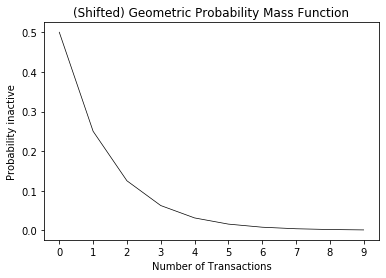

In [25]:
#假设某一次交易后，用户流失的概率为0.5
p = 0.5
p_arr = []

#那对于这么一个人，随着被观察到的交易次数的增加，他的流失概率会递减
for i in range(0,10): 
    proba_inactive = p*(1-p)**(i-1)
    p_arr.append(proba_inactive)
p_arr = np.array(p_arr)
p_arr /= p_arr.sum()

plt.plot(range(0, 10), p_arr, color='black', linewidth=0.7, zorder=1)
plt.ylabel('Probability inactive')
plt.xlabel('Number of Transactions')
plt.xticks(range(0, 10))
plt.title('(Shifted) Geometric Probability Mass Function')
plt.show()

#与交易频次类似的，每个人的流失概率都是不同的。（也就是每个人的曲线是不同的）

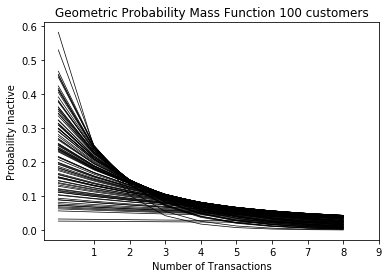

In [14]:
#为了将每个人的p都给描绘出来，我们得到了一个新的假设，那就是每个人的流失概率p分布是不均匀的，而且他们的分布符合由参数a和b决定的
#Beta分布

#让我们来看一下，一个由参数
beta_a = 3
beta_b = 9 #决定的Beta函数能够描绘一群怎样的用户流失率曲线

for customer in range(0, 100):
  p_arr = []
  beta = np.random.beta(a=beta_a, b=beta_b)
  for transaction in range(1,10): 
    proba_inactive = beta*(1-beta)**(transaction-1)
    p_arr.append(proba_inactive)
  p_arr = np.array(p_arr)
  plt.plot(p_arr, color='black', linewidth=0.7, zorder=1)

plt.ylabel('Probability Inactive')
plt.xlabel('Number of Transactions')
plt.xticks(range(1, 10))
plt.title('Geometric Probability Mass Function 100 customers')
plt.show()
#通过用户的历史数据，模型可以学习到符合特定人群的流失概率p的beta分布的a，b参数。从而确定每个人的流失概率p的具体数值。
#以回答“这名用户在未来一段时间内的流失概率/存活概率，其中存活概率=1-流失概率”